## Simulating the spin model:

In [1]:
import statsmodels.api as sm
import pickle

In [2]:
from ising_utils import *

In [3]:
def bornholdt_field(model, i):
    """Compute the local field at spin i"""
    total_neighbors = np.sum(model.connection_matrix[i] * model.spins)
    magnetization = np.sum(model.spins) / len(model.spins)
    return model.J * total_neighbors - model.alpha * model.spins[i] * magnetization

In [4]:
# parameters
side = 32
dim = 2
J = 1
alpha = 4
T = 1.5

Running simulation with 1024 spins, J=1, alpha=4, T=1.5, steps=10000
Step 0/10000
Step 1000/10000
Step 2000/10000
Step 3000/10000
Step 4000/10000
Step 5000/10000
Step 6000/10000
Step 7000/10000
Step 8000/10000
Step 9000/10000
Simulation finished


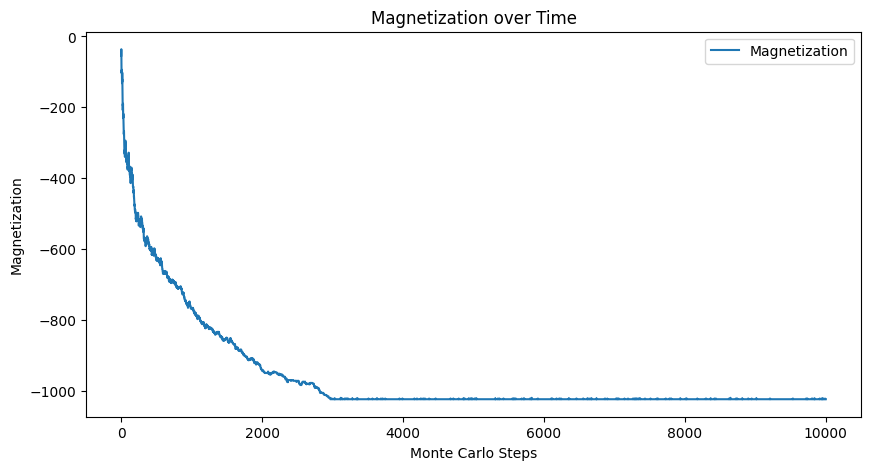

interactive(children=(IntSlider(value=0, description='t', max=9999), Output()), _dom_classes=('widget-interact…

In [5]:
# Running the simulation
model = LatticeSpinMarketModel(side=side, dim=dim, J=J, alpha=alpha, T=T,  local_field_func=bornholdt_field)
spin_series = model.run_simulation(steps=10000, verbose=True)
model.plot_magnetization()
model.plot_lattice(interactive=True)

In [6]:
# pickle.dump(model, open("bornholdt_model.pkl", "wb"))

In [7]:
# model = pickle.load(open("bornholdt_model.pkl", "rb"))

In the paper, it is not clear how the logarithmic relative change $\text{ret}(t)=\ln(M(t))-\ln(M(t-1))$ is defined, considering that $M(t)$ can have negative values. We test shifting all its values up by its minimum possible value, and using its absolute value.

/var/folders/2n/ywnb5cc17zq6c5n2w2n7bkzw0000gn/T/ipykernel_62290/3588179226.py:5: RuntimeWarning: divide by zero encountered in log
  log_returns = np.diff(np.log(magnetization_series_shifted))
/Users/edoardoghirardo/miniconda/envs/thesis/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1496: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


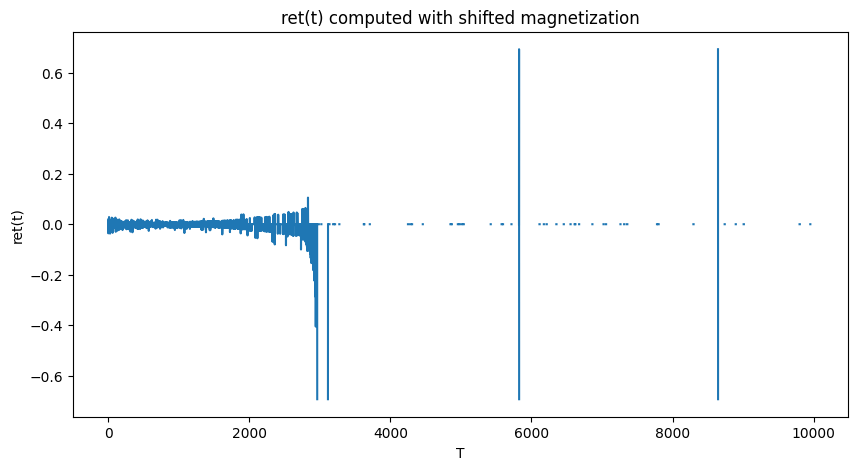

In [12]:
n = side**dim

magnetization_series_shifted = [np.sum(spin)/n + 1 for spin in model.spin_series]

log_returns = np.diff(np.log(magnetization_series_shifted))

plt.figure(figsize=(10, 5))
plt.plot(log_returns)
plt.xlabel("T")
plt.ylabel("ret(t)")
plt.title("ret(t) computed with shifted magnetization")
plt.show()

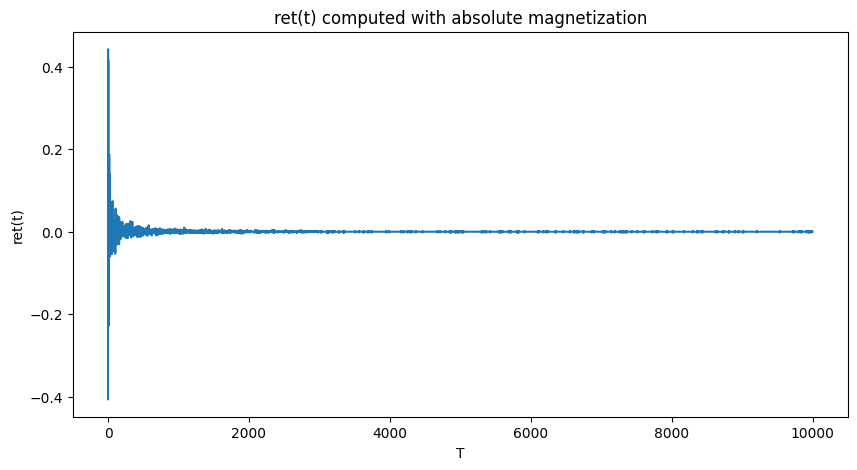

In [11]:
abs_magnetization_series = [abs(np.sum(spin))/n for spin in model.spin_series]

log_returns = np.diff(np.log(abs_magnetization_series))
log_returns = log_returns[np.isfinite(log_returns)]

plt.figure(figsize=(10, 5))
plt.plot(log_returns)
plt.xlabel("T")
plt.ylabel("ret(t)")
plt.title("ret(t) computed with absolute magnetization")
plt.show()

Qualitatively, the graph corresponding to the absolute value resembles the one in the paper more closely. We will use that one for now. Next, we plot the cumulative distribution of log returns.

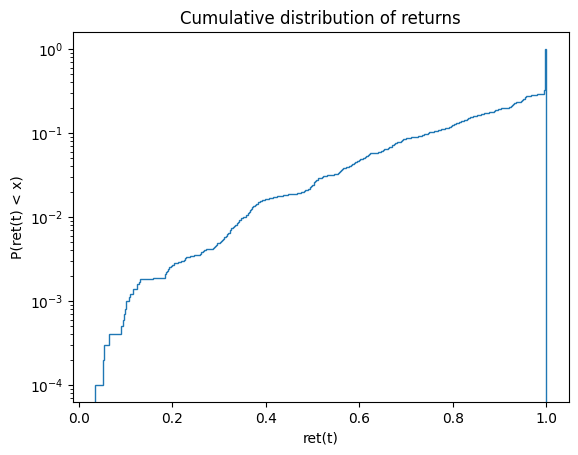

In [13]:
abs_returns = np.abs(np.diff([np.sum(spin) for spin in model.spin_series]))
plt.hist(abs_magnetization_series, bins=500, density=True, cumulative=True, histtype='step')
plt.xlabel("ret(t)")
plt.ylabel("P(ret(t) < x)")
plt.title("Cumulative distribution of returns")
plt.yscale('log')
plt.show()

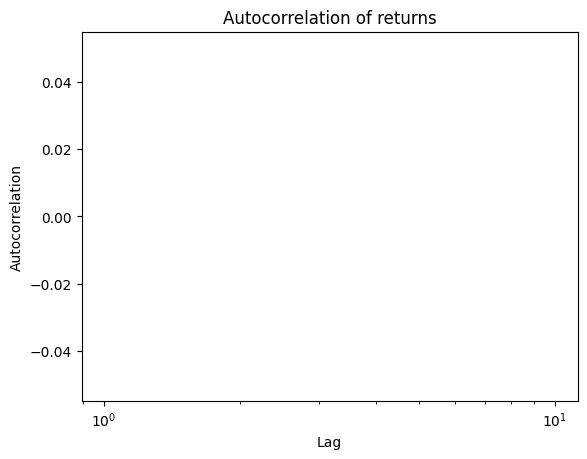

In [14]:
autocorr = sm.tsa.acf(np.abs(log_returns), nlags=np.shape(log_returns)[0] - 1)

plt.plot(autocorr)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of returns")
plt.xscale('log')
plt.show()

# understand better

to do:
- understand what kind of magnetization is used
- understand the distribution of returns
- understand why we always end up in a ferromagnetic phase